In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.plotly as py
from string import punctuation as pct
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
df = pd.read_json('data_analysis.json')

In [3]:
#fill rate for each category
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
address             999986 non-null object
category_code       999986 non-null object
city                999986 non-null object
headcount           962352 non-null object
name                999986 non-null object
phone               590889 non-null object
revenue             943092 non-null object
state               999986 non-null object
time_in_business    916125 non-null object
zip                 999988 non-null object
dtypes: object(10)
memory usage: 83.9+ MB
None


In [4]:
df

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850
3,6032 CHEROKEE DR,54000000,CINCINNATI,1 to 4,YOU'RE ART,4174513798,"Less Than $500,000",OH,10+ years,45243
4,1315 N WOOSTER AVE,54100000,STRASBURG,1 to 4,Hayberg Restoration Network LLC,5135612584,"$500,000 to $1 Million",OH,10+ years,44680
5,1521 AZALEA RD,23610000,MOBILE,5 to 9,Venzon Engineering,None,$2.5 to 5 Million,AL,6-10 years,36693
6,23513 PLAYVIEW ST,54100000,SAINT CLAIR SHORES,1 to 4,Sunrise Solutions Inc,4082621271,$1 to 2.5 Million,MI,10+ years,48082
7,178 BOOTHBAY RD,23611600,EDGECOMB,1 to 4,Discount Hauling LLC,None,"Less Than $500,000",ME,10+ years,04556
8,7 HAZZARD ST,56000000,WEST PALM BEACH,1 to 4,Knight Equestrian Books,None,"Less Than $500,000",FL,10+ years,33406
9,8054 DARROW RD STE 3,45100000,TWINSBURG,10 to 19,CHILDRENS HOSPITAL PHYS. ASSOC.,2078825494,"Less Than $500,000",OH,None,44087


In [5]:
# true valued fill rate for zip
not_null_zips = df[df['zip'].notnull()]['zip']
correct_zips = filter(lambda x: len(str(x)) == 5, not_null_zips)
print len(correct_zips)
print len(set(correct_zips))

953374
24410


In [6]:
df[df['zip'].isnull()]['zip']

19529     None
35388     None
98992     None
197658    None
380630    None
739431    None
801765    None
814638    None
834673    None
836173    None
911906    None
961427    None
Name: zip, dtype: object

In [7]:
# true values fill rate for phone
not_null_phones = df[df['phone'].notnull()]['phone']
correct_phones = filter(lambda x: len(str(x)) == 10, not_null_phones)
print len(correct_phones)
print len(set(correct_phones))

581380
565731


In [8]:
state_abrevs = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'VI', 'PR']

In [9]:
# true valued fill rate for state
not_null_states = df[df['state'].notnull()]['state']
correct_states = filter(lambda x: str(x).upper() in state_abrevs, not_null_states)

In [10]:
'PR' in df['state'].values

True

In [11]:
len(correct_states)

995397

In [12]:
print len(correct_states)
print len(set(correct_states))

995397
52


In [13]:
# true values fill rate for category code
naics = pd.read_csv('NAICS.csv')

In [14]:
codes = df['category_code'].dropna()
string_codes= codes.apply(lambda x: str(x))

In [15]:
'worms'[:-2]

'wor'

In [16]:
string_codes = string_codes.apply(lambda x: x[:-2])

In [17]:
naics_codes = naics['NAICS Code'].dropna()
adjusted_codes = naics_codes.apply(lambda x: str(x).ljust(6, '0'))

In [18]:
filtered_codes = filter(lambda x: str(x) in adjusted_codes.values, string_codes)

In [19]:
len(adjusted_codes.unique())

1665

In [20]:
len(filtered_codes)

959560

In [21]:
# true values fill rate for address
address = df['address'].dropna()
string_address = address.apply(lambda x: str(x))

In [22]:
address_components = string_address.apply(lambda x: x.split(' '))

In [23]:
correct_addresses = filter(lambda x: x[0].isdigit() and len(x) >= 2, address_components)

In [24]:
string_addresses = []
for address in correct_addresses:
    string_address = " ".join(address)
    string_addresses.append(string_address)

In [25]:
len(set(string_addresses))

888603

In [26]:
# true values fill rate for city
city = df['city'].dropna()

In [27]:
correct_cities = filter(lambda x: len(str(x)) > 2, city)

In [28]:
len(correct_cities)

999926

In [29]:
# true values fill rate for headcount
headcount = df['headcount'].dropna()
string_headcount = headcount.apply(lambda x: str(x))

In [30]:
string_headcount.unique()

array(['50 to 99', '1 to 4', '5 to 9', '10 to 19', '20 to 49',
       '100 to 249', '250 to 499', '500 to 999', 'Over 1,000', '0', 'none',
       'null', ' ', ''], dtype=object)

In [31]:
desired_counts = ['50 to 99', '1 to 4', '5 to 9', '10 to 19', '20 to 49',
'100 to 249', '250 to 499', '500 to 999', 'Over 1,000',]
correct_counts = filter(lambda x: x in desired_counts, string_headcount)

In [32]:
len(correct_counts)

962273

In [33]:
# true values fill rate for name
names = df['name'].dropna()
unwanted = ['', ' ', '0', 0, 'A', 'Q', 'none', 'null', '' ]

In [34]:
correct_names = filter(lambda x: x not in unwanted, names)

In [35]:
real = filter(lambda x: len(x) > 1, correct_names)

In [36]:
sro = filter(lambda x: len(x) == 4, correct_names)
sro.sort()
sro

[u'1020',
 u'1900',
 u'2307',
 u'24 K',
 u'3 PD',
 u'3- D',
 u'96.7',
 u'A AA',
 u'A Ri',
 u'AAGL',
 u'AAIM',
 u'AAMA',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AARP',
 u'AATC',
 u'AATF',
 u'AAUP',
 u'ABCD',
 u'ABEC',
 u'ABIA',
 u'ABMC',
 u'ABMP',
 u'AC4S',
 u'ACEN',
 u'ACES',
 u'ACES',
 u'ACIS',
 u'ACLD',
 u'ACLD',
 u'ACLD',
 u'ACLD',
 u'ACLU',
 u'ACLU',
 u'ACNT',
 u'ACPN',
 u'ACQC',
 u'ACRA',
 u'ACRS',
 u'ACSI',
 u'ACSI',
 u'ACTS',
 u'ACTS',
 u'AD 1',
 u'ADAM',
 u'ADBP',
 u'ADED',
 u'ADEM',
 u'ADFX',
 u'ADIT',
 u'AEHS',
 u'AESC',
 u'AFCO',
 u'AFG&',
 u'AFGE',
 u'AGFP',
 u'AGIA',
 u'AGIO',
 u'AGTS',
 u'AHBL',
 u'AHEC',
 u'AHIA',
 u'AICB',
 u'AIHQ',
 u'AIRE',
 u'AISM',
 u'AKIN',
 u'AKRF',
 u'ALBL',
 u'ALCO',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDI',
 u'ALDO',
 u'ALDO',
 u'ALDO',
 u'ALFA',
 u'ALJC',
 u'ALPA',
 u'ALPS',


In [37]:
len(real)

999908

In [38]:
# true values fill rate for revenue
revenues = df['revenue'].apply(lambda x: str(x))

In [39]:
revenues.unique()

array(['$20 to 50 Million', 'Less Than $500,000', '$500,000 to $1 Million',
       '$2.5 to 5 Million', '$1 to 2.5 Million', 'None',
       '$5 to 10 Million', '$10 to 20 Million', '$50 to 100 Million',
       '$100 to 500 Million', 'Over $1 Billion', 'Over $500 Million',
       'none', 'null', '0', '', ' '], dtype=object)

In [40]:
wanted_revs = ['$20 to 50 Million', 'Less Than $500,000', '$500,000 to $1 Million',
       '$2.5 to 5 Million', '$1 to 2.5 Million',
       '$5 to 10 Million', '$10 to 20 Million', '$50 to 100 Million',
       '$100 to 500 Million', 'Over $1 Billion', 'Over $500 Million',]

In [41]:
correct_revs = filter(lambda x: x in wanted_revs, revenues)

In [42]:
len(correct_revs)

943001

In [43]:
# true values fill rate for time in business
times = df['time_in_business'].dropna()

In [44]:
string_times = times.apply(lambda x: str(x))

In [45]:
string_times.unique()

array(['10+ years', '6-10 years', '1-2 years', '3-5 years', 'null', '0',
       'Less than a year', ' ', '', 'none'], dtype=object)

In [46]:
wanted_times = ['10+ years', '6-10 years', '1-2 years', '3-5 years', 'Less than a year']

In [47]:
correct_times = filter(lambda x: x in wanted_times, string_times)

In [48]:
len(correct_times)

916048

In [49]:
print len(df)
print len(df.dropna(axis=0, how='any'))

1000000
490979


In [50]:
len(df.dropna(axis=0, how='any'))

490979

In [51]:
df

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850
3,6032 CHEROKEE DR,54000000,CINCINNATI,1 to 4,YOU'RE ART,4174513798,"Less Than $500,000",OH,10+ years,45243
4,1315 N WOOSTER AVE,54100000,STRASBURG,1 to 4,Hayberg Restoration Network LLC,5135612584,"$500,000 to $1 Million",OH,10+ years,44680
5,1521 AZALEA RD,23610000,MOBILE,5 to 9,Venzon Engineering,None,$2.5 to 5 Million,AL,6-10 years,36693
6,23513 PLAYVIEW ST,54100000,SAINT CLAIR SHORES,1 to 4,Sunrise Solutions Inc,4082621271,$1 to 2.5 Million,MI,10+ years,48082
7,178 BOOTHBAY RD,23611600,EDGECOMB,1 to 4,Discount Hauling LLC,None,"Less Than $500,000",ME,10+ years,04556
8,7 HAZZARD ST,56000000,WEST PALM BEACH,1 to 4,Knight Equestrian Books,None,"Less Than $500,000",FL,10+ years,33406
9,8054 DARROW RD STE 3,45100000,TWINSBURG,10 to 19,CHILDRENS HOSPITAL PHYS. ASSOC.,2078825494,"Less Than $500,000",OH,None,44087


In [57]:
state_df = df['state'].apply(lambda x: str(x))
state_df.unique()
state_counts = pd.get_dummies(df['state'])

In [69]:
state_counts = pd.get_dummies(df_clean['state']).sum(axis=0)

In [70]:
unwanted = [' ', 'VI', '0', 'null', '', 'none', None, 0]

In [71]:
df_clean = df.replace(unwanted, 'N/A')

In [72]:
state_counts.index = state_counts.index.map(str)

In [73]:
state_counts.index

Index([u'AK', u'AL', u'AR', u'AZ', u'CA', u'CO', u'CT', u'DC', u'DE', u'FL',
       u'GA', u'HI', u'IA', u'ID', u'IL', u'IN', u'KS', u'KY', u'LA', u'MA',
       u'MD', u'ME', u'MI', u'MN', u'MO', u'MS', u'MT', u'N/A', u'NC', u'ND',
       u'NE', u'NH', u'NJ', u'NM', u'NV', u'NY', u'OH', u'OK', u'OR', u'PA',
       u'PR', u'RI', u'SC', u'SD', u'TN', u'TX', u'UT', u'VA', u'VT', u'WA',
       u'WI', u'WV', u'WY'],
      dtype='object')

In [74]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_counts.index,
        z = state_counts,
        locationmode = 'USA-states',
        text = None,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number Of Businesses")
        ) ]

layout = dict(
        title = 'Businesses By State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
        autosize=False,
        width=2000,
        height=2000
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [75]:
state_pop = pd.read_csv('census-state-populations.csv')
state_pop

,state,pop_est_2014
0,AL,4849377
1,AK,736732
2,AZ,6731484
3,AR,2966369
4,CA,38802500
5,CO,5355866
6,CT,3596677
7,DE,935614
8,DC,658893
9,FL,19893297


In [76]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_pop['state'],
        z = state_pop['pop_est_2014'],
        locationmode = 'USA-states',
        text = None,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Population (Millions)")
        ) ]

layout = dict(
        title = 'Population By State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

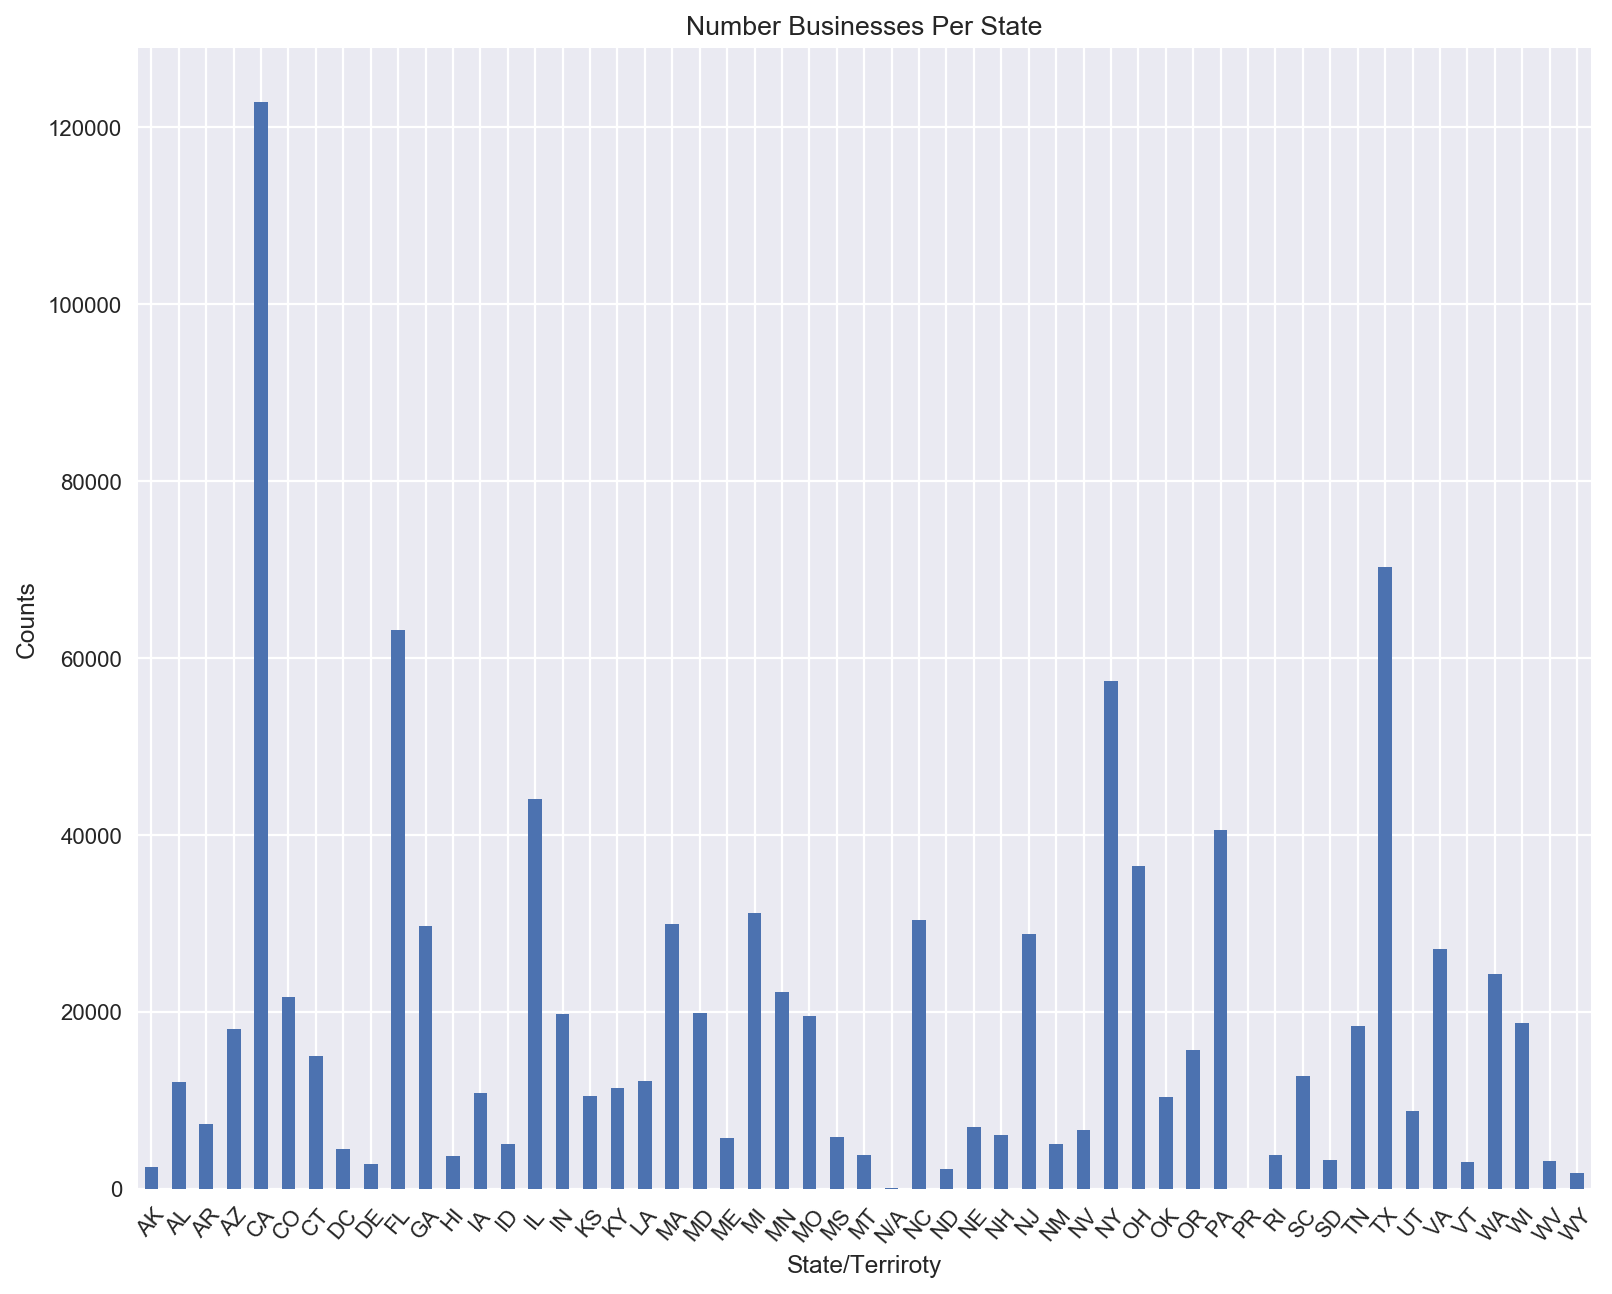

In [77]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=160)
state_counts.plot(kind='bar')
ax.set_ylabel('Counts')
ax.set_title('Number Businesses Per State')
ax.set_xlabel('State/Terriroty')
plt.xticks(rotation=50)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('Businesses_per_state')

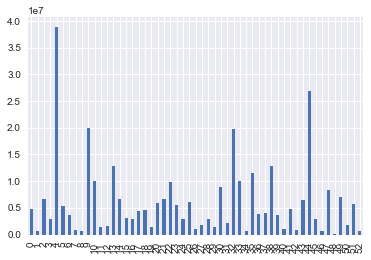

In [78]:
state_pop['pop_est_2014'].plot(kind='bar')

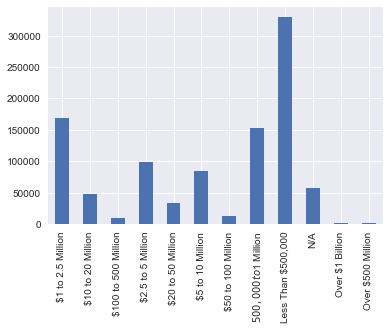

In [79]:
pd.get_dummies(df_clean['revenue']).sum(axis=0).plot(kind='bar')

In [80]:
len(df_clean[(df_clean['state'] == 'CA') &  (df_clean['revenue'] == 'Over $1 Billion')])

202

In [81]:
df_clean.revenue.unique()

array([u'$20 to 50 Million', u'Less Than $500,000',
       u'$500,000 to $1 Million', u'$2.5 to 5 Million',
       u'$1 to 2.5 Million', 'N/A', u'$5 to 10 Million',
       u'$10 to 20 Million', u'$50 to 100 Million', u'$100 to 500 Million',
       u'Over $1 Billion', u'Over $500 Million'], dtype=object)

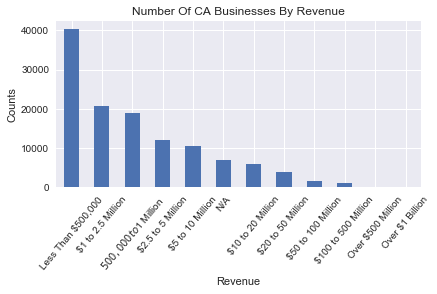

In [82]:
fig, ax = plt.subplots()
df_clean[df_clean['state'] == 'CA']['revenue'].value_counts().plot(kind='bar')
ax.set_ylabel('Counts')
ax.set_title('Number Of CA Businesses By Revenue')
ax.set_xlabel('Revenue')
plt.xticks(rotation=50)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig('Ca_biz_by_revenue')
plt.show()

In [83]:
(df_clean[(df_clean['state'] == 'CA')] == 'N/A').sum().sum()

72488

In [84]:
df_clean[(df_clean['state'] == 'CA')].size

1228120

In [85]:
21700 / 403880

0.053728830345647224

In [86]:
72488 / 1228120

0.05902354818747354

In [87]:
(df_clean == 'N/A').sum().sum()

588482

In [88]:
df_clean.size

10000000

In [89]:
588482 / 10000000

0.0588482

In [90]:
df_clean['missing'] = (df_clean == 'N/A').sum(axis=1)

In [131]:
clean_ca_df = df_clean[df_clean['state'] == 'CA']
clean_ca_df['missing'] = df_clean[df_clean['state'] == 'CA']['missing']
clean_ca_df

/Users/jrrd/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip,missing
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131,0
12,530 LAKESIDE DR,52230000,SUNNYVALE,5 to 9,MULTICOREWARE INC,5033361658,N/A,CA,10+ years,94085,1
14,2170 STOCKBRIDGE AVE,81300000,WOODSIDE,N/A,Woodside Group Inc,N/A,N/A,CA,10+ years,94062,3
29,555 CALIFORNIA ST STE 4,52200000,SAN FRANCISCO,1 to 4,Klemmt Orthopaedic Services,N/A,"Less Than $500,000",CA,10+ years,94104,1
30,11040 SANTA MONICA BLVD,81300000,LOS ANGELES,50 to 99,Hilton Garden Inn Outer Banks Kitty Hawk,N/A,$1 to 2.5 Million,CA,10+ years,90025,1
43,4636 MISSION GORGE PL STE 103B,52420000,SAN DIEGO,1 to 4,Estate Planning & Preservation,6192822121,"Less Than $500,000",CA,10+ years,92120,0
69,9292 9TH ST,52200000,RANCHO CUCAMONGA,N/A,Secard Pools,N/A,$5 to 10 Million,CA,10+ years,91730,2
73,321 HAMPTON DR STE 202,45321002,VENICE,1 to 4,PERLOFF & WEBSTER,3035364388,"Less Than $500,000",CA,N/A,90291,1
74,220 W 7TH ST,62110000,OXNARD,1 to 4,Ghent Family Practice,7032815522,"Less Than $500,000",CA,10+ years,93030,0
80,3736 MT DIABLO BLVD,44411000,LAFAYETTE,5 to 9,DMI SERVICES LLC,8573503032,"Less Than $500,000",CA,10+ years,94549,0


In [91]:
(df_clean['state'] == 'CA').sum()/len(df_clean)

0.122812

In [116]:
for state in state_abrevs:
    biz_pct = (df_clean['state'] == state).sum()/len(df_clean)
    print state, biz_pct

AK 0.002515
AL 0.012172
AZ 0.018152
AR 0.007377
CA 0.122812
CO 0.021781
CT 0.015107
DE 0.002849
FL 0.063245
GA 0.029797
HI 0.003754
ID 0.005135
IL 0.044126
IN 0.019861
IA 0.01088
KS 0.010523
KY 0.011393
LA 0.012229
ME 0.005793
MD 0.019973
MA 0.030014
MI 0.031237
MN 0.022243
MS 0.005864
MO 0.019558
MT 0.003817
NE 0.00708
NV 0.0067
NH 0.006139
NJ 0.028837
NM 0.005076
NY 0.057411
NC 0.030389
ND 0.002315
OH 0.036524
OK 0.010456
OR 0.01569
PA 0.040609
RI 0.00388
SC 0.012842
SD 0.003306
TN 0.018445
TX 0.070301
UT 0.008873
VT 0.003029
VA 0.027161
WA 0.024295
WV 0.003217
WI 0.018754
WY 0.001858
VI 0.0
PR 2e-06


In [132]:
((clean_ca_df['revenue'] == 'Less Than $500,000') & (clean_ca_df['missing'] == 1)).sum()

17338

In [134]:
ca_rev_mask = clean_ca_df['revenue'] == 'Less Than $500,000'
ca_missing = clean_ca_df['missing'] == 1
((ca_rev_mask) & (ca_missing)).sum()

17338

In [139]:
clean_ca_df[clean_ca_df['revenue'] == 'Less Than $500,000'].size

444268

In [140]:
17338 / 444268

0.03902599331934778

In [149]:
clean_ca_df[ca_rev_mask]['city'].value_counts()[:50]

SAN DIEGO           1982
LOS ANGELES         1745
SAN FRANCISCO       1609
SAN JOSE            1015
SACRAMENTO           786
IRVINE               719
OAKLAND              549
FRESNO               503
LONG BEACH           387
ANAHEIM              375
SANTA BARBARA        364
SANTA ANA            357
PASADENA             355
TORRANCE             352
SANTA ROSA           345
SANTA MONICA         340
BAKERSFIELD          325
NEWPORT BEACH        307
BERKELEY             290
SANTA CLARA          281
FREMONT              275
HUNTINGTON BEACH     274
RIVERSIDE            269
BEVERLY HILLS        266
CARLSBAD             263
PALO ALTO            260
ORANGE               254
COSTA MESA           251
WALNUT CREEK         240
BURBANK              232
GLENDALE             211
SAN RAFAEL           211
ROSEVILLE            205
SUNNYVALE            204
VENTURA              201
HAYWARD              200
MODESTO              200
ONTARIO              198
SANTA CRUZ           197
STOCKTON             195


In [119]:
((df_clean['state'] == 'CA') & (df_clean['revenue'] == 'Less Than $500,000')).sum()

40388

In [142]:
df_clean[(df_clean['state'] == 'CA') & (df_clean['revenue'] == 'Less Than $500,000')]['city'].value_counts()

SAN DIEGO             1982
LOS ANGELES           1745
SAN FRANCISCO         1609
SAN JOSE              1015
SACRAMENTO             786
IRVINE                 719
OAKLAND                549
FRESNO                 503
LONG BEACH             387
ANAHEIM                375
SANTA BARBARA          364
SANTA ANA              357
PASADENA               355
TORRANCE               352
SANTA ROSA             345
SANTA MONICA           340
BAKERSFIELD            325
NEWPORT BEACH          307
BERKELEY               290
SANTA CLARA            281
FREMONT                275
HUNTINGTON BEACH       274
RIVERSIDE              269
BEVERLY HILLS          266
CARLSBAD               263
PALO ALTO              260
ORANGE                 254
COSTA MESA             251
WALNUT CREEK           240
BURBANK                232
                      ... 
MOUNTAIN CENTER          1
PLEASANT GROVE           1
UPPER LAKE               1
WOFFORD HEIGHTS          1
EL GRANADA               1
WEST LOS ANGELES         1
F

In [ ]:
naics['adjusted_naics'] = adjusted_codes

In [ ]:
61111000    
54111000    
53120000    

In [ ]:
df.info()

In [ ]:
len(df[df['state'] == 'CA'])

In [ ]:
122812/1350932

In [ ]:
df[df['state'] == 'CA'].size

In [ ]:
len(df_clean['category_code'].unique())

In [ ]:
df_clean['revenue']

In [ ]:
df_clean['phone'] = df_clean['phone'].values.astype(str)

In [ ]:
type(df_clean['phone'])

In [99]:
punct = '( )-'

In [ ]:
df_clean['phone']

In [ ]:
df_clean['phone'] = df_clean['phone'].apply(lambda x: x.translate(None, punct))

In [ ]:
df_clean['phone']

In [ ]:
not_null_phones = df[df['phone'].notnull()]['phone']

In [97]:
not_null_phones = not_null_phones.astype(str)

In [100]:
not_null_phones = not_null_phones.apply(lambda x: x.translate(None, punct))
correct_phones = filter(lambda x: len(x) == 10, not_null_phones)

In [101]:
tvfr_phones = len(correct_phones)

In [102]:
tvfr_phones

590798

In [103]:
len(not_null_phones)

590889

In [104]:
correct_phones = not_null_phones[not_null_phones.apply(lambda x: len(x) == 10)]

In [105]:
incorrect_phones = filter(lambda x: len(x) != 10, not_null_phones)

In [106]:
len(filter(lambda x: len(x) == 10, not_null_phones))

590798

In [107]:
len(incorrect_phones)

91

In [108]:
df_clean.duplicated().sum()

0

In [109]:
# check correlations

In [110]:
df_clean.columns

Index([         u'address',    u'category_code',             u'city',
              u'headcount',             u'name',            u'phone',
                u'revenue',            u'state', u'time_in_business',
                    u'zip',          u'missing'],
      dtype='object')

In [111]:
def check_feature_independence(df_clean, features, target):   
    print "Checking for feature independece from {}".format(target)
    for feature in features:
        if feature == target:
            continue
        temp_crosstab = pd.crosstab(df_clean[feature], df_clean[target], margins=True)
        chi2, p_value, dof, expected = chi2_contingency(temp_crosstab)
        print "{} : chi2: {} | p-value: {} | dof: {}".format(feature, chi2, p_value, dof)

In [ ]:
features_1 = ['address',
              'city',
              'headcount',
              'name',
              'phone',
              'revenue',
              'state',
              'time_in_business',
              'zip']
targets = features_1
for target in targets:
    check_feature_independence(df_clean, features_1, target)